In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6974 - val_loss: 0.6972
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6971 - val_loss: 0.6969
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6968 - val_loss: 0.6966
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6965 - val_loss: 0.6963
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6963 - val_loss: 0.6961
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6960 - val_loss: 0.6958
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6958 - val_loss: 0.6956
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6955 - val_loss: 0.6953
Epoch 9/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 10/10
235/235 [==========

Epoch 1/50
235/235 [==============================] - 8s 28ms/step - loss: 0.3994 - val_loss: 0.3460
Epoch 2/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3445 - val_loss: 0.3312
Epoch 3/50
235/235 [==============================] - 6s 27ms/step - loss: 0.3354 - val_loss: 0.3298
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3313 - val_loss: 0.3281
Epoch 5/50
235/235 [==============================] - 7s 29ms/step - loss: 0.3283 - val_loss: 0.3286
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3263 - val_loss: 0.3287
Epoch 7/50
235/235 [==============================] - 7s 28ms/step - loss: 0.3244 - val_loss: 0.3291
Epoch 8/50
235/235 [==============================] - 6s 24ms/step - loss: 0.3230 - val_loss: 0.3311
Epoch 9/50
235/235 [==============================] - 6s 26ms/step - loss: 0.3218 - val_loss: 0.3308
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.3208 - val_lo

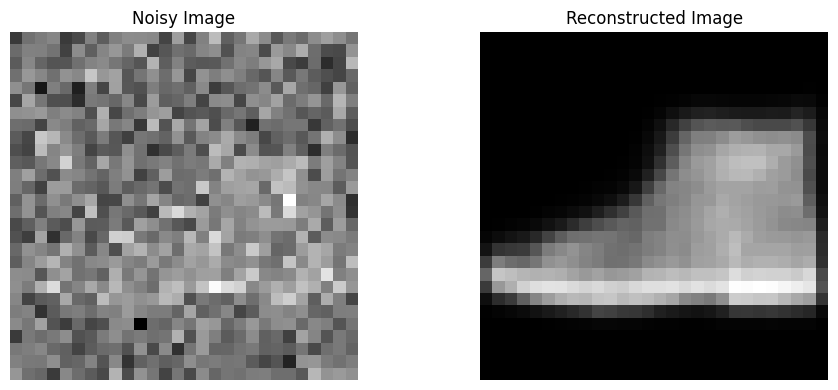

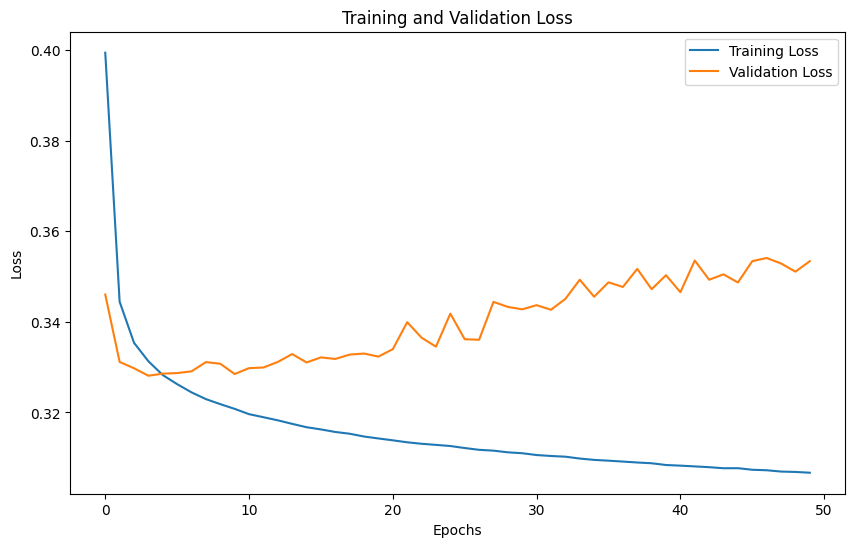

In [3]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Size of encoded representations
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(256, activation='relu')(input_img)
encoded = Dropout(0.5)(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Model to map an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Predict on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualization
plt.figure(figsize=(10, 4))

# Original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[0].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
